In [1]:
import wg1template

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

import wg1template.histogram_plots as wg1
import wg1template.point_plots as points
from wg1template.plot_style import TangoColors
from wg1template.plot_utilities import export

from root_pandas import read_root

import pandas as pd

Welcome to JupyROOT 6.20/04


In [2]:
uu = read_root('uubarContinuumSuppression.root')
dd = read_root('ddbarContinuumSuppression.root')
ss = read_root('ssbarContinuumSuppression.root')

signal = read_root('B+_hadronic_50.root')

In [3]:
dummy_var = wg1.HistVariable("R2",
                             n_bins=25,
                             scope=(0,1),
                             var_name="R2",
                             unit="GeV")


In [10]:
hp1 = wg1.StackedHistogramPlot(dummy_var)
hp1.add_component("uubar", uu, weights=uu.__weight__, color=TangoColors.slate,
                  comp_type='stacked')
hp1.add_component("ddbar", dd, weights=dd.__weight__, color=TangoColors.sky_blue,
                  comp_type='stacked')
hp1.add_component("ss_signal", ss, weights=ss.__weight__, color=TangoColors.orange,
                  comp_type='stacked')

hp2 = wg1.SimpleHistogramPlot(dummy_var)
hp2.add_component("Signal Shape", ss, weights=ss.__weight__ * 0.5,
                  color=TangoColors.scarlet_red, ls='-.')

fig, ax = wg1.create_solo_figure()
hp1.plot_on(ax, ylabel="Candidates")
hp2.plot_on(ax, hide_labels=True)  # Hide labels to prevent overrides)
wg1.add_descriptions_to_plot(
    ax,
    experiment='Belle II',
    luminosity=r"$\int \mathcal{L} \,dt=5\,\mathrm{fb}^{-1}$",
    additional_info='WG1 Preliminary Plot Style\nStackedHistogramPlot\n+SimpleHistogramPlot'
)
plt.show()
export(fig, 'combo', 'examples')
plt.close()

KeyError: 'R2'

In [ ]:
hp1 = wg1.DataMCHistogramPlot(dummy_var)
hp1.add_mc_component("uubar", uu, weights=uu.__weight__, color=TangoColors.slate)
hp1.add_mc_component("ddbar", dd, weights=dd.__weight__, color=TangoColors.sky_blue)

hp1.add_data_component("Data_ssbar", ss)

hp2 = wg1.SimpleHistogramPlot(dummy_var)
hp2.add_component("Signal Shape x0.5", ss, weights=ss.__weight__ * 0.5,
                  color=TangoColors.scarlet_red, ls='dotted')

fig, ax = wg1.create_hist_ratio_figure()
hp1.plot_on(ax[0], ax[1], style='stacked', ylabel="Candidates")
hp2.plot_on(ax[0], hide_labels=True)  # Hide labels to prevent overrides
wg1.add_descriptions_to_plot(
    ax[0],
    experiment='Belle II',
    luminosity=r"$\int \mathcal{L} \,dt=5\,\mathrm{fb}^{-1}$",
    additional_info='WG1 Preliminary Plot Style\nDataMCHistogramPlot\n+SimpleHistogramPlot'
)
plt.show()
export(fig, 'combo2', 'examples')
plt.close()

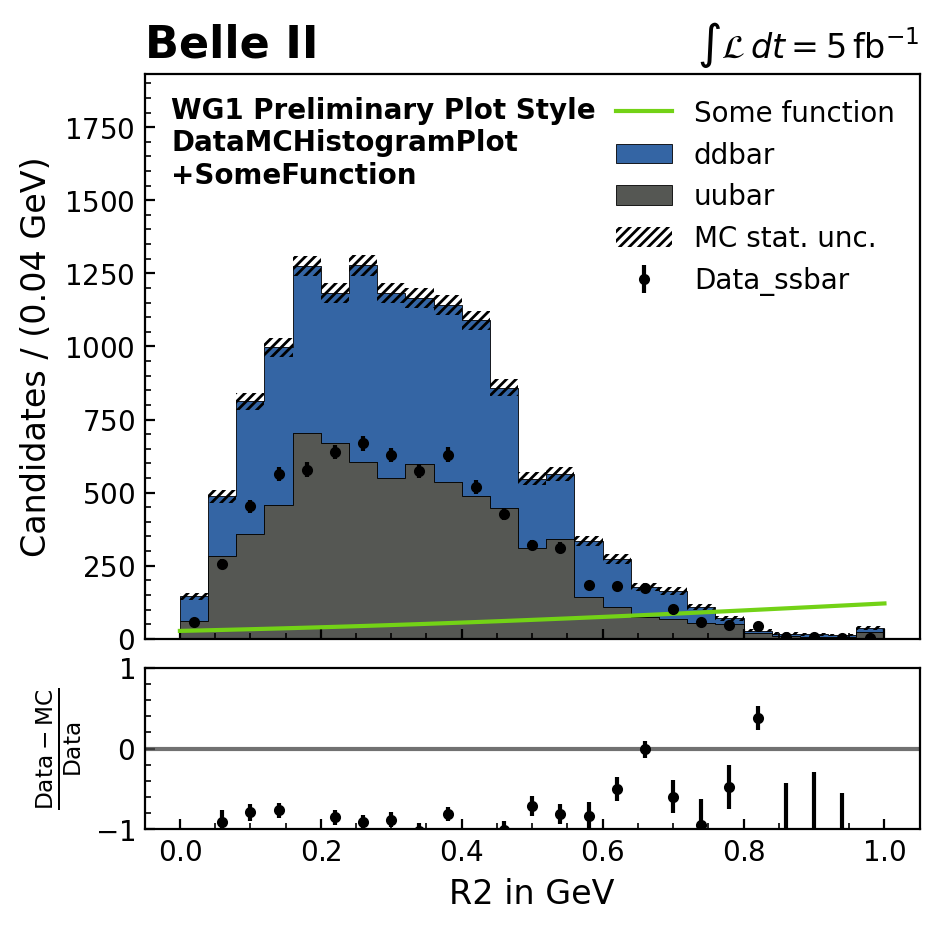

In [5]:
hp = wg1.DataMCHistogramPlot(dummy_var)
hp.add_mc_component("uubar", uu, weights=uu.__weight__, color=TangoColors.slate)
hp.add_mc_component("ddbar", dd, weights=dd.__weight__, color=TangoColors.sky_blue)
hp.add_data_component("Data_ssbar", ss)
fig, ax = wg1.create_hist_ratio_figure()
hp.plot_on(ax[0], ax[1], style="stacked", ylabel="Candidates")
wg1.add_descriptions_to_plot(
    ax[0],
    experiment='Belle II',
    luminosity=r"$\int \mathcal{L} \,dt=5\,\mathrm{fb}^{-1}$",
    additional_info='WG1 Preliminary Plot Style\nDataMCHistogramPlot\n+SomeFunction'
)

# Let's add some functions
ax[0].plot(
    np.linspace(*dummy_var.scope),
    500 * scipy.stats.norm(2).pdf(np.linspace(*dummy_var.scope)),
    label="Some function", color=TangoColors.chameleon,
)
ax[0].legend(frameon=False)

plt.show()
export(fig, 'combo3', 'examples')
plt.close()

In [6]:
x = np.linspace(0.5, 10.5, num=10)
y = np.array([np.random.normal(a, 1) for a in x])
x_err = 0.5 * np.ones(10)
y_err = np.ones(10)

variable = points.DataVariable(r"x-variable", r"x-units", r"y-variable", "y-units")
measured = DataPoints(
    x_values=x,
    y_values=y,
    x_errors=x_err,
    y_errors=y_err,
)

x = np.linspace(0.5, 10.5, num=10)
y = np.array([np.random.normal(a, 1) for a in x])
x_err = 0.5 * np.ones(10)
y_err = np.ones(10)*0.5
theory = DataPoints(
    x_values=x,
    y_values=y,
    x_errors=x_err,
    y_errors=y_err,
)

dp = DataPointsPlot(variable)
dp.add_component("Data Label", measured, style='point')
dp.add_component("Theory Label", theory, style='box', color=TangoColors.scarlet_red)

fig, ax = wg1.create_solo_figure(figsize=(5, 5))
dp.plot_on(ax)
wg1.add_descriptions_to_plot(
    ax,
    experiment='Can be misused',
    luminosity='This too',
    additional_info=r'Some process'
)
plt.show()
export(fig, 'data', 'examples')
plt.close()

NameError: name 'DataPoints' is not defined